In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image, ImageChops, ImageEnhance
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from pylab import *
import re
from keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [9]:
# Ensuring that plots are displayed inline in Jupyter Notebook
%matplotlib inline

sns.set(style='white', context='notebook', palette='deep')
np.random.seed(2)

def get_imlist(path):
    return [os.path.join(path, f) for f in os.listdir(path) if f.endswith('.jpg') or f.endswith('.png')]

def convert_to_ela_image(path, quality):
    filename = path
    resaved_filename = filename.split('.')[0] + '.resaved.jpg'
    ELA_filename = filename.split('.')[0] + '.ela.png'
    
    im = Image.open(filename).convert('RGB')
    im.save(resaved_filename, 'JPEG', quality=quality)
    resaved_im = Image.open(resaved_filename)
    
    ela_im = ImageChops.difference(im, resaved_im)
    
    extrema = ela_im.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    
    ela_im = ImageEnhance.Brightness(ela_im).enhance(scale)
    
    return ela_im

# Path to the dataset
real_path = 'C:\\Users\\Rohin s\\Desktop\\dataset\\preal'
fake_path = 'C:\\Users\\Rohin s\\Desktop\\dataset\\pfake'


# Read images and convert to ELA images
real_images = get_imlist(real_path)
fake_images = get_imlist(fake_path)

X = []
Y = []

# Process real images
for img_path in real_images:
    ela_img = convert_to_ela_image(img_path, 90)
    X.append(np.array(ela_img))
    Y.append(0)  # Label for real images

# Process fake images
for img_path in fake_images:
    ela_img = convert_to_ela_image(img_path, 90)
    X.append(np.array(ela_img))
    Y.append(1)  # Label for fake images

# Convert lists to numpy arrays
X = np.array(X)
Y = np.array(Y)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encode the labels
Y_train = to_categorical(Y_train, num_classes=2)
Y_test = to_categorical(Y_test, num_classes=2)

# Build the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False
)

# Train the model
batch_size = 30
epochs = 20

history = model.fit(datagen.flow(X_train, Y_train, batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(X_test, Y_test),
                    verbose=2,
                    steps_per_epoch=X_train.shape[0] // batch_size,
                    callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1),
                               EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

Epoch 1/20
21/21 - 57s - 3s/step - accuracy: 0.4757 - loss: 0.7179 - val_accuracy: 0.4630 - val_loss: 0.6934 - learning_rate: 0.0010
Epoch 2/20
21/21 - 5s - 240ms/step - accuracy: 0.6000 - loss: 0.6921 - val_accuracy: 0.5000 - val_loss: 0.6937 - learning_rate: 0.0010
Epoch 3/20
21/21 - 54s - 3s/step - accuracy: 0.5032 - loss: 0.6933 - val_accuracy: 0.4938 - val_loss: 0.6941 - learning_rate: 0.0010
Epoch 4/20
21/21 - 5s - 254ms/step - accuracy: 0.4667 - loss: 0.6922 - val_accuracy: 0.4815 - val_loss: 0.6921 - learning_rate: 0.0010
Epoch 5/20
21/21 - 54s - 3s/step - accuracy: 0.5210 - loss: 0.6952 - val_accuracy: 0.4753 - val_loss: 0.6941 - learning_rate: 0.0010
Epoch 6/20
21/21 - 5s - 243ms/step - accuracy: 0.6000 - loss: 0.6912 - val_accuracy: 0.4630 - val_loss: 0.6948 - learning_rate: 0.0010
Epoch 7/20

Epoch 7: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
21/21 - 54s - 3s/step - accuracy: 0.5113 - loss: 0.6952 - val_accuracy: 0.4938 - val_loss: 0.6926 - learnin

In [11]:
def get_imlist(path):
    return [os.path.join(path,f) for f in os.listdir(path) if f.endswith('.jpg') or f.endswith('.png')]

In [13]:
def convert_to_ela_image(path, quality):
    filename = path
    resaved_filename = filename.split('.')[0] + '.resaved.jpg'
    ELA_filename = filename.split('.')[0] + '.ela.png'

    
    im = Image.open(filename).convert('RGB')
    im.save(resaved_filename, 'JPEG', quality=quality)
    resaved_im = Image.open(resaved_filename)
    
    ela_im = ImageChops.difference(im, resaved_im)
    
    extrema = ela_im.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    
    ela_im = ImageEnhance.Brightness(ela_im).enhance(scale)
    
    return ela_im

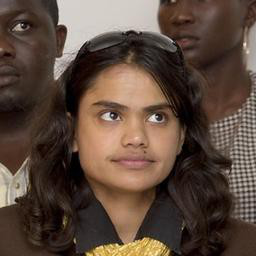

In [15]:
Image.open('C:\\Users\\Rohin s\\Desktop\\dataset\\preal\\real_88.resaved.jpg')

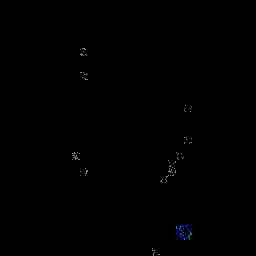

In [17]:
convert_to_ela_image('C:\\Users\\Rohin s\\Desktop\\dataset\\preal\\real_88.resaved.jpg', 90)

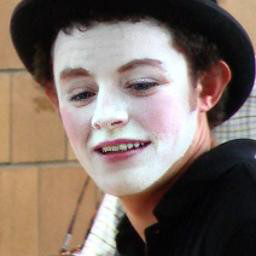

In [19]:
Image.open('C:\\Users\\Rohin s\\Desktop\\dataset\\pfake\\fake_9698.resaved.jpg')

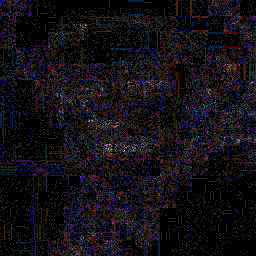

In [21]:
convert_to_ela_image('C:\\Users\\Rohin s\\Desktop\\dataset\\pfake\\fake_9698.jpg',90)

In [49]:
model = Sequential()
# First convolutional layer with L2 regularization
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3), kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D((2, 2)))
print("Input: ", model.input_shape)
print("Output: ", model.output_shape)

# Second Conv2D layer with L2 regularization
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D((2, 2)))

print("Input: ", model.input_shape)
print("Output: ", model.output_shape)

# Second convolutional layer

print("Input: ", model.input_shape)
print("Output: ", model.output_shape)

# Max pooling and dropout
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
print("Input: ", model.input_shape)
print("Output: ", model.output_shape)

# Flatten the feature map
model.add(Flatten())

# Fully connected (dense) layer
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

# Output layer with softmax for binary classification
model.add(Dense(2, activation='softmax'))

# Compile the model
optimizer = RMSprop(learning_rate=0.0005)  # Updated learning rate parameter
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_accuracy',
                               min_delta=0,
                               patience=3,  # Allow up to 3 epochs without improvement
                               verbose=1,    # Print a message when early stopping is triggered
                               mode='max',   # Monitor the maximum of validation accuracy
                               restore_best_weights=True)  # Restore the best weights after stopping


# Summary of the model architecture
model.summary()

# Train the model
history = model.fit(X_train, Y_train,
                    batch_size=5,
                    epochs=2,
                    validation_data=(X_test, Y_test),
                    verbose=2)

Input:  (None, 256, 256, 3)
Output:  (None, 127, 127, 32)
Input:  (None, 256, 256, 3)
Output:  (None, 62, 62, 32)
Input:  (None, 256, 256, 3)
Output:  (None, 62, 62, 32)
Input:  (None, 256, 256, 3)
Output:  (None, 31, 31, 32)


D:\New folder\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 125, 125, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 30752)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │     7,872,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,883,426 (30.07 MB)

 Trainable params: 7,883,426 (30.07 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
130/130 - 15s - 112ms/step - accuracy: 0.5309 - loss: 0.9880 - val_accuracy: 0.5309 - val_loss: 0.8744
Epoch 2/2
130/130 - 13s - 101ms/step - accuracy: 0.6528 - loss: 0.7956 - val_accuracy: 0.6111 - val_loss: 0.7810


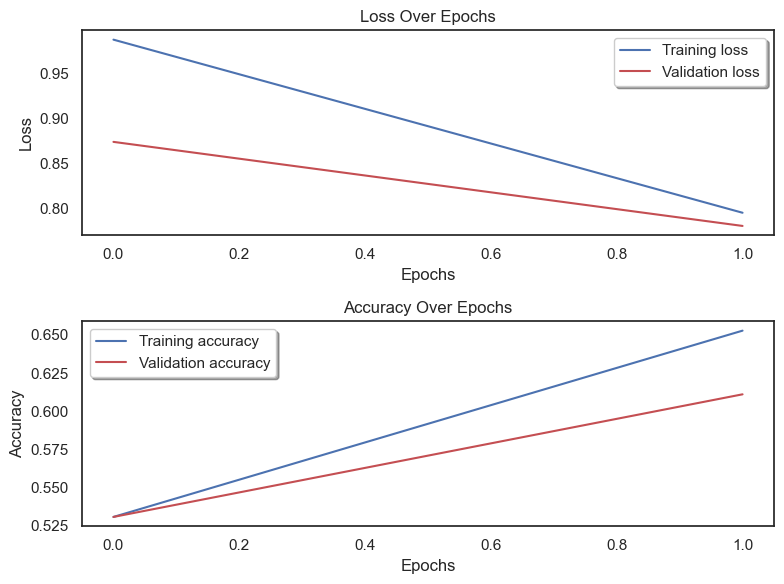

In [51]:
# Create subplots
fig, ax = plt.subplots(2, 1, figsize=(8, 6))

# Plot training and validation loss
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss")
ax[0].set_title('Loss Over Epochs')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend(loc='best', shadow=True)

# Plot training and validation accuracy
ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r', label="Validation accuracy")
ax[1].set_title('Accuracy Over Epochs')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend(loc='best', shadow=True)

# Show the plots
plt.tight_layout()
plt.show()

21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step
Confusion matrix, without normalization


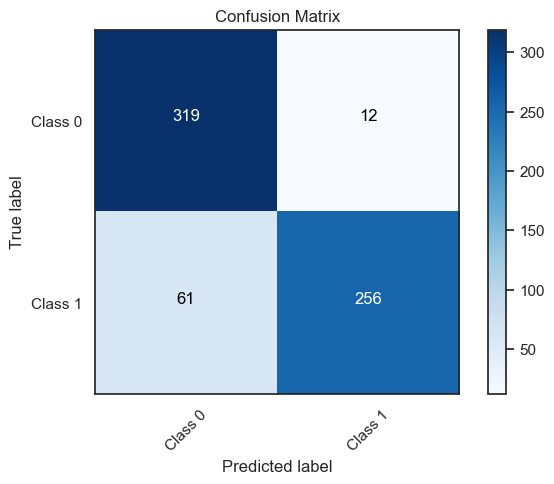

In [53]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming X_train and Y_train are already defined
# Example:
# X_train = your_train_data
# Y_train = your_train_labels

# Step 1: Predict the values from the training dataset
Y_pred = model.predict(X_train)

# Step 2: Convert predictions classes to one hot vectors (argmax)
Y_pred_classes = np.argmax(Y_pred, axis=1)  # Take the class with max probability

# Step 3: If Y_train is one-hot encoded, convert it to class indices
if Y_train.ndim > 1:  # Check if it's one-hot encoded
    Y_true = np.argmax(Y_train, axis=1)  # Convert one-hot to class indices
else:
    Y_true = Y_train  # If it's already in class indices format, use it directly

# Step 4: Compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# Step 5: Plot the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot confusion matrix
plot_confusion_matrix(confusion_mtx, classes=['Class 0', 'Class 1'], normalize=False)


In [28]:

model.save('moddel.keras')


In [45]:
from keras.models import load_model
import numpy as np
from PIL import Image, ImageChops, ImageEnhance

# Function to convert an image to ELA format
def convert_to_ela_image(path, quality=90):
    filename = path
    resaved_filename = filename.split('.')[0] + '.resaved.jpg'
    ela_filename = filename.split('.')[0] + '.ela.png'
    
    # Open and resave the image to check compression differences
    im = Image.open(filename).convert('RGB')
    im.save(resaved_filename, 'JPEG', quality=quality)
    resaved_im = Image.open(resaved_filename)
    
    # Compute the difference
    ela_im = ImageChops.difference(im, resaved_im)
    
    # Scale the difference to enhance visibility
    extrema = ela_im.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    
    ela_im = ImageEnhance.Brightness(ela_im).enhance(scale)
    
    # Save the ELA image
    ela_im.save(ela_filename)
    
    return ela_im

# Function to load the model and make predictions
def predict_image(model_path, image_path):
    # Load the pre-trained CNN model
    model = load_model(model_path)
    
    # Convert the image to ELA format
    ela_image = convert_to_ela_image(image_path)
    
    # Resize the ELA image to match the model's input shape (256x256)
    ela_image = ela_image.resize((256, 256))
    
    # Convert the image to an array and ensure it's in the correct format (RGB)
    ela_array = np.array(ela_image) / 255.0  # Normalize pixel values
    if ela_array.shape != (256, 256, 3):
        ela_array = np.array(ela_image.convert('RGB')) / 255.0  # Convert to RGB if needed
    
    # Add batch dimension
    ela_array = np.expand_dims(ela_array, axis=0)

    # Make a prediction
    prediction = model.predict(ela_array)
    
    # Determine if the image is real or fake
    if prediction[0][0] > prediction[0][1]:
        print("The image is REAL.")
    else:
        print("The image is  a deepfake .")

# Example usage
model_path = 'moddel.keras'  # Path to the saved CNN model
image_path = 'C:\\Users\\Rohin s\\Desktop\\exreal\\real_9773.jpg' # Path to the image you want to classify

predict_image(model_path, image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
The image is REAL.


In [33]:
def predict_image(model, image_path):
    # Convert the image to ELA format
    ela_image = convert_to_ela_image(image_path)
    
    # Resize the ELA image to match the input size of the model
    ela_image = ela_image.resize((256, 256))  # Changed to 256x256 to match the model's input shape
    ela_array = np.array(ela_image) / 255.0  # Normalize pixel values
    ela_array = np.expand_dims(ela_array, axis=0)  # Add batch dimension

    # Make a prediction
    prediction = model.predict(ela_array)
    
    # Determine if the image is real or fake
    if prediction[0][0] > prediction[0][1]:
        print("The image is a Deepfake.")
    else:
        print("The image is Real.")

In [35]:
print(model.input_shape)


(None, 256, 256, 3)


In [31]:
import tensorflow as tf
import os

# Suppress TensorFlow warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
tf.get_logger().setLevel('ERROR')
